In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-2-ratings-0-noise/'
features_path = '../../data/features-generated-data-2-ratings-0-noise'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]

#file_to_delete = data_directory + '.DS_Store'
#os.remove(file_to_delete)

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Random selection
for _ in range(10):
    selection = ObjectSelection(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')

Object selection: random

Dfmf

auc: 0.6450123152709359

rmse: 1.1880141863873015


-----


Object selection: random

Dfmf

auc: 0.6097077312556937

rmse: 1.2027413082069536


-----


Object selection: random

Dfmf

auc: 0.6371007497175721

rmse: 1.1999593998120823


-----


Object selection: random

Dfmf

auc: 0.6113710427717969

rmse: 1.1832256090165576


-----


Object selection: random

Dfmf

auc: 0.633765411619735

rmse: 1.1912310952810474


-----


Object selection: random

Dfmf

auc: 0.6284221099326034

rmse: 1.187676841541635


-----


Object selection: random

Dfmf

auc: 0.6123044276288406

rmse: 1.214929717886744


-----


Object selection: random

Dfmf

auc: 0.628872272511731

rmse: 1.189459452371682


-----


Object selection: random

Dfmf

auc: 0.6197553111428709

rmse: 1.1940465631154622


-----


Object selection: random

Dfmf

auc: 0.6269

rmse: 1.196810683965286


-----




Object selection: knn

Draw object selection results

Classification Accuracy
0.6805555555555556



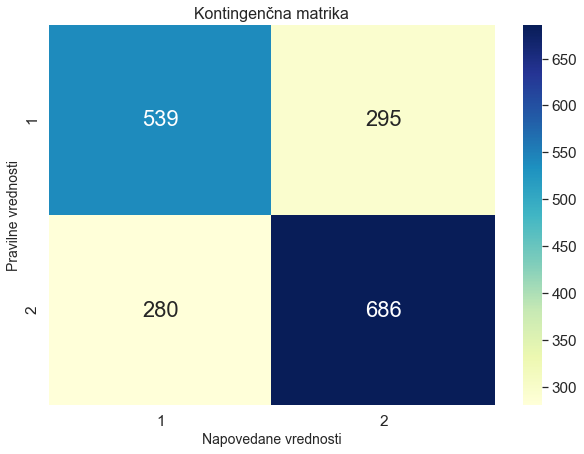


Dfmf

auc: 0.6782859187144051

rmse: 1.23811252919416


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.6805555555555556



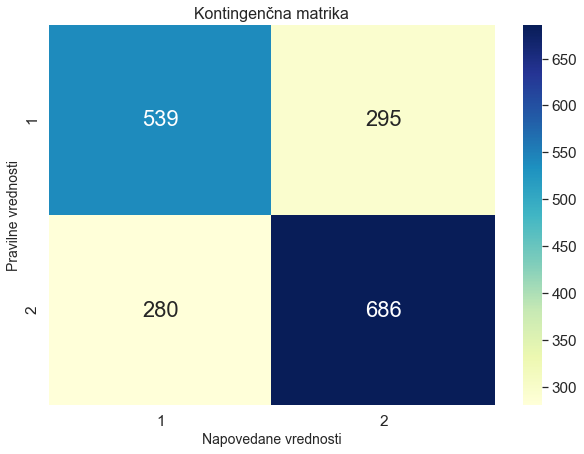


Dfmf

auc: 0.668880170575693

rmse: 1.1965441193365982


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.6805555555555556



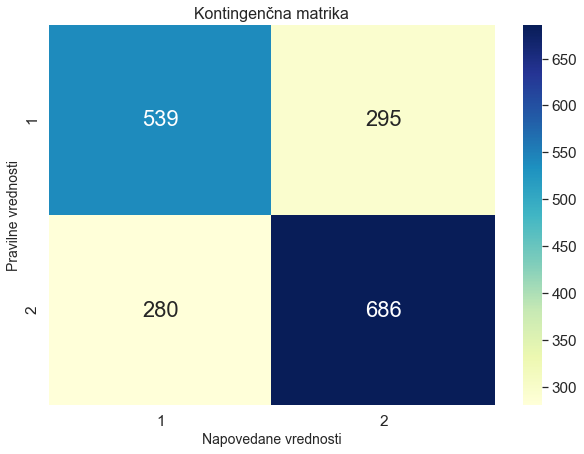


Dfmf

auc: 0.6732192953139082

rmse: 1.2215112770106715


-----




In [3]:
# K Nearest Neighbors
for _ in range(3):
    selection = ObjectSelection(show_selection_results=True, selection_algorithm='knn')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')